In [2]:
# Begin Lesson 3

In [5]:
# Sıcaklık tahmini yapmak için regresyon kullanılır.
# Evet hayır cevapları için classification kullanılır.
# Zamana bağlı veriye time series denir.

Model Nasıl Oluşturulur

1. Data Set Oluşturulur.
2. Data Temizlenir
3. Datalar dönüştürülür.
4. Model eğitilir.
5. Model optimize edilene kadar eğitilir.
6. Test model oluşturulur.
7. Optimize edilmiş modelle yeni datalar tahmin edilir.
8. Model yayınlanır.
9. Geri dönüşlere göre model güncellenir.

In [6]:
# Code Begin 

# Regression - Geçmiş verilerden geleceği tahmin etme 

Bu derste regression algoritmalarını derinlemesine öğreneceğiz. Araba fiyatlarını tahmin eden bir makine öğrenmesi modeli geliştireceğiz.
Başarı oranını yüzde 85 in üstünde tutmaya çalışacğız.

In [9]:
#pip install xlrd

### Datayı okuma

In [50]:
import pandas as pd # veri dosyasını okuma ve manipüle etme paketi
import sqlite3
import matplotlib.pyplot as plt

In [12]:
conn = sqlite3.connect('cars.db')

In [14]:
df = pd.read_sql_query('select * from cars',conn)

In [15]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [16]:
conn.close()

In [20]:
df = pd.read_excel('cars.xls')

### EDA - Exporatory Data Analysis - Keşifçi Veri Analizi

In [23]:
df.head() # ilk 5 satır

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [24]:
df.tail()  # son 5 satır

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [26]:
df.shape # satır ve sütun sayisi

(804, 12)

In [27]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [32]:
df.isnull().sum() # hangi sutunda kac bos veri var

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [33]:
df.describe() # istatistik verir

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


### Korelasyon Hesaplama

In [34]:
df.corr(numeric_only= True)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [36]:
import seaborn as sns

<Axes: >

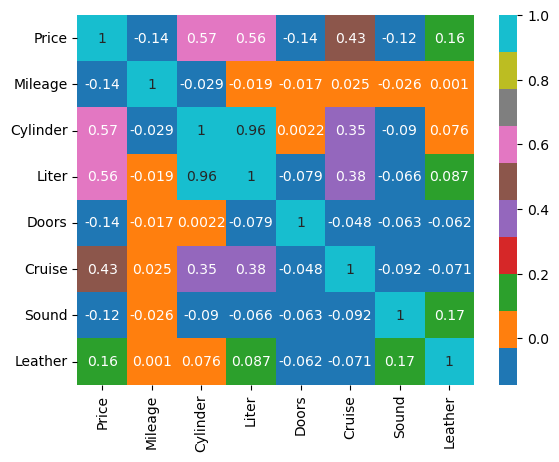

In [38]:
sns.heatmap(df.corr(numeric_only= True),annot = True , cmap= 'tab10' )

In [40]:
df['Make'].unique() # Tekil veriler

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [41]:
df['Make'].value_counts()

Make
Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: count, dtype: int64

In [42]:
df['Make'].value_counts(normalize = True)

Make
Chevrolet    0.398010
Pontiac      0.186567
SAAB         0.141791
Buick        0.099502
Cadillac     0.099502
Saturn       0.074627
Name: proportion, dtype: float64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Buick'),
  Text(1, 0, 'Cadillac'),
  Text(2, 0, 'Chevrolet'),
  Text(3, 0, 'Pontiac'),
  Text(4, 0, 'SAAB'),
  Text(5, 0, 'Saturn')])

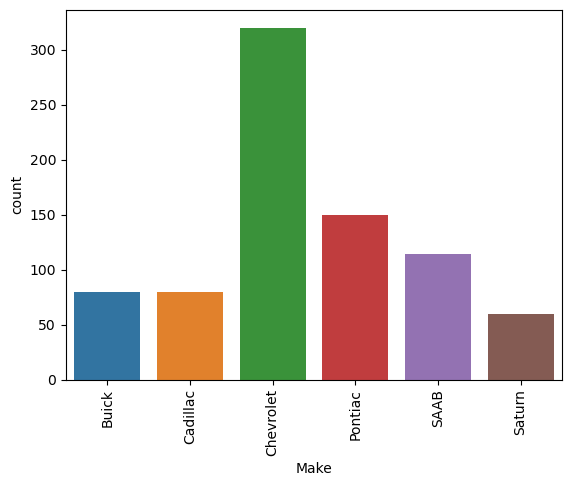

In [52]:
sns.countplot(x = df['Make'] , hue =df['Make'])
plt.xticks(rotation = 90)

<Axes: xlabel='count', ylabel='Make'>

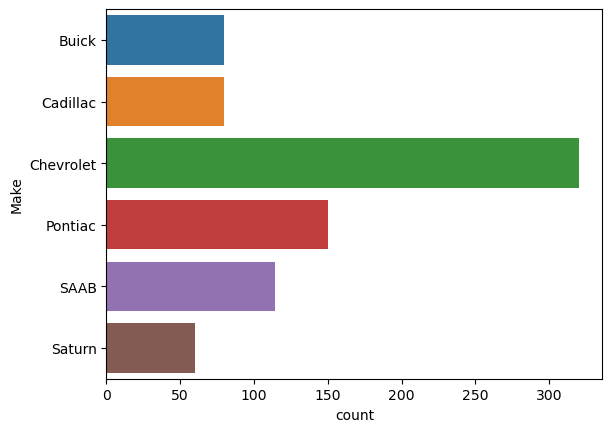

In [48]:
sns.countplot(y = df['Make'] , hue =df['Make'])

<Axes: xlabel='Cylinder', ylabel='count'>

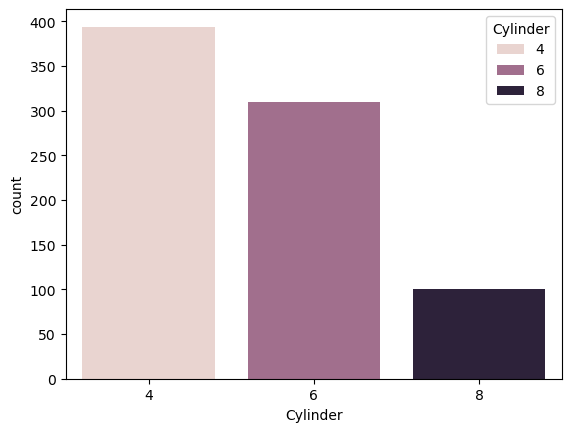

In [53]:
sns.countplot(x = df['Cylinder'] , hue =df['Cylinder'])

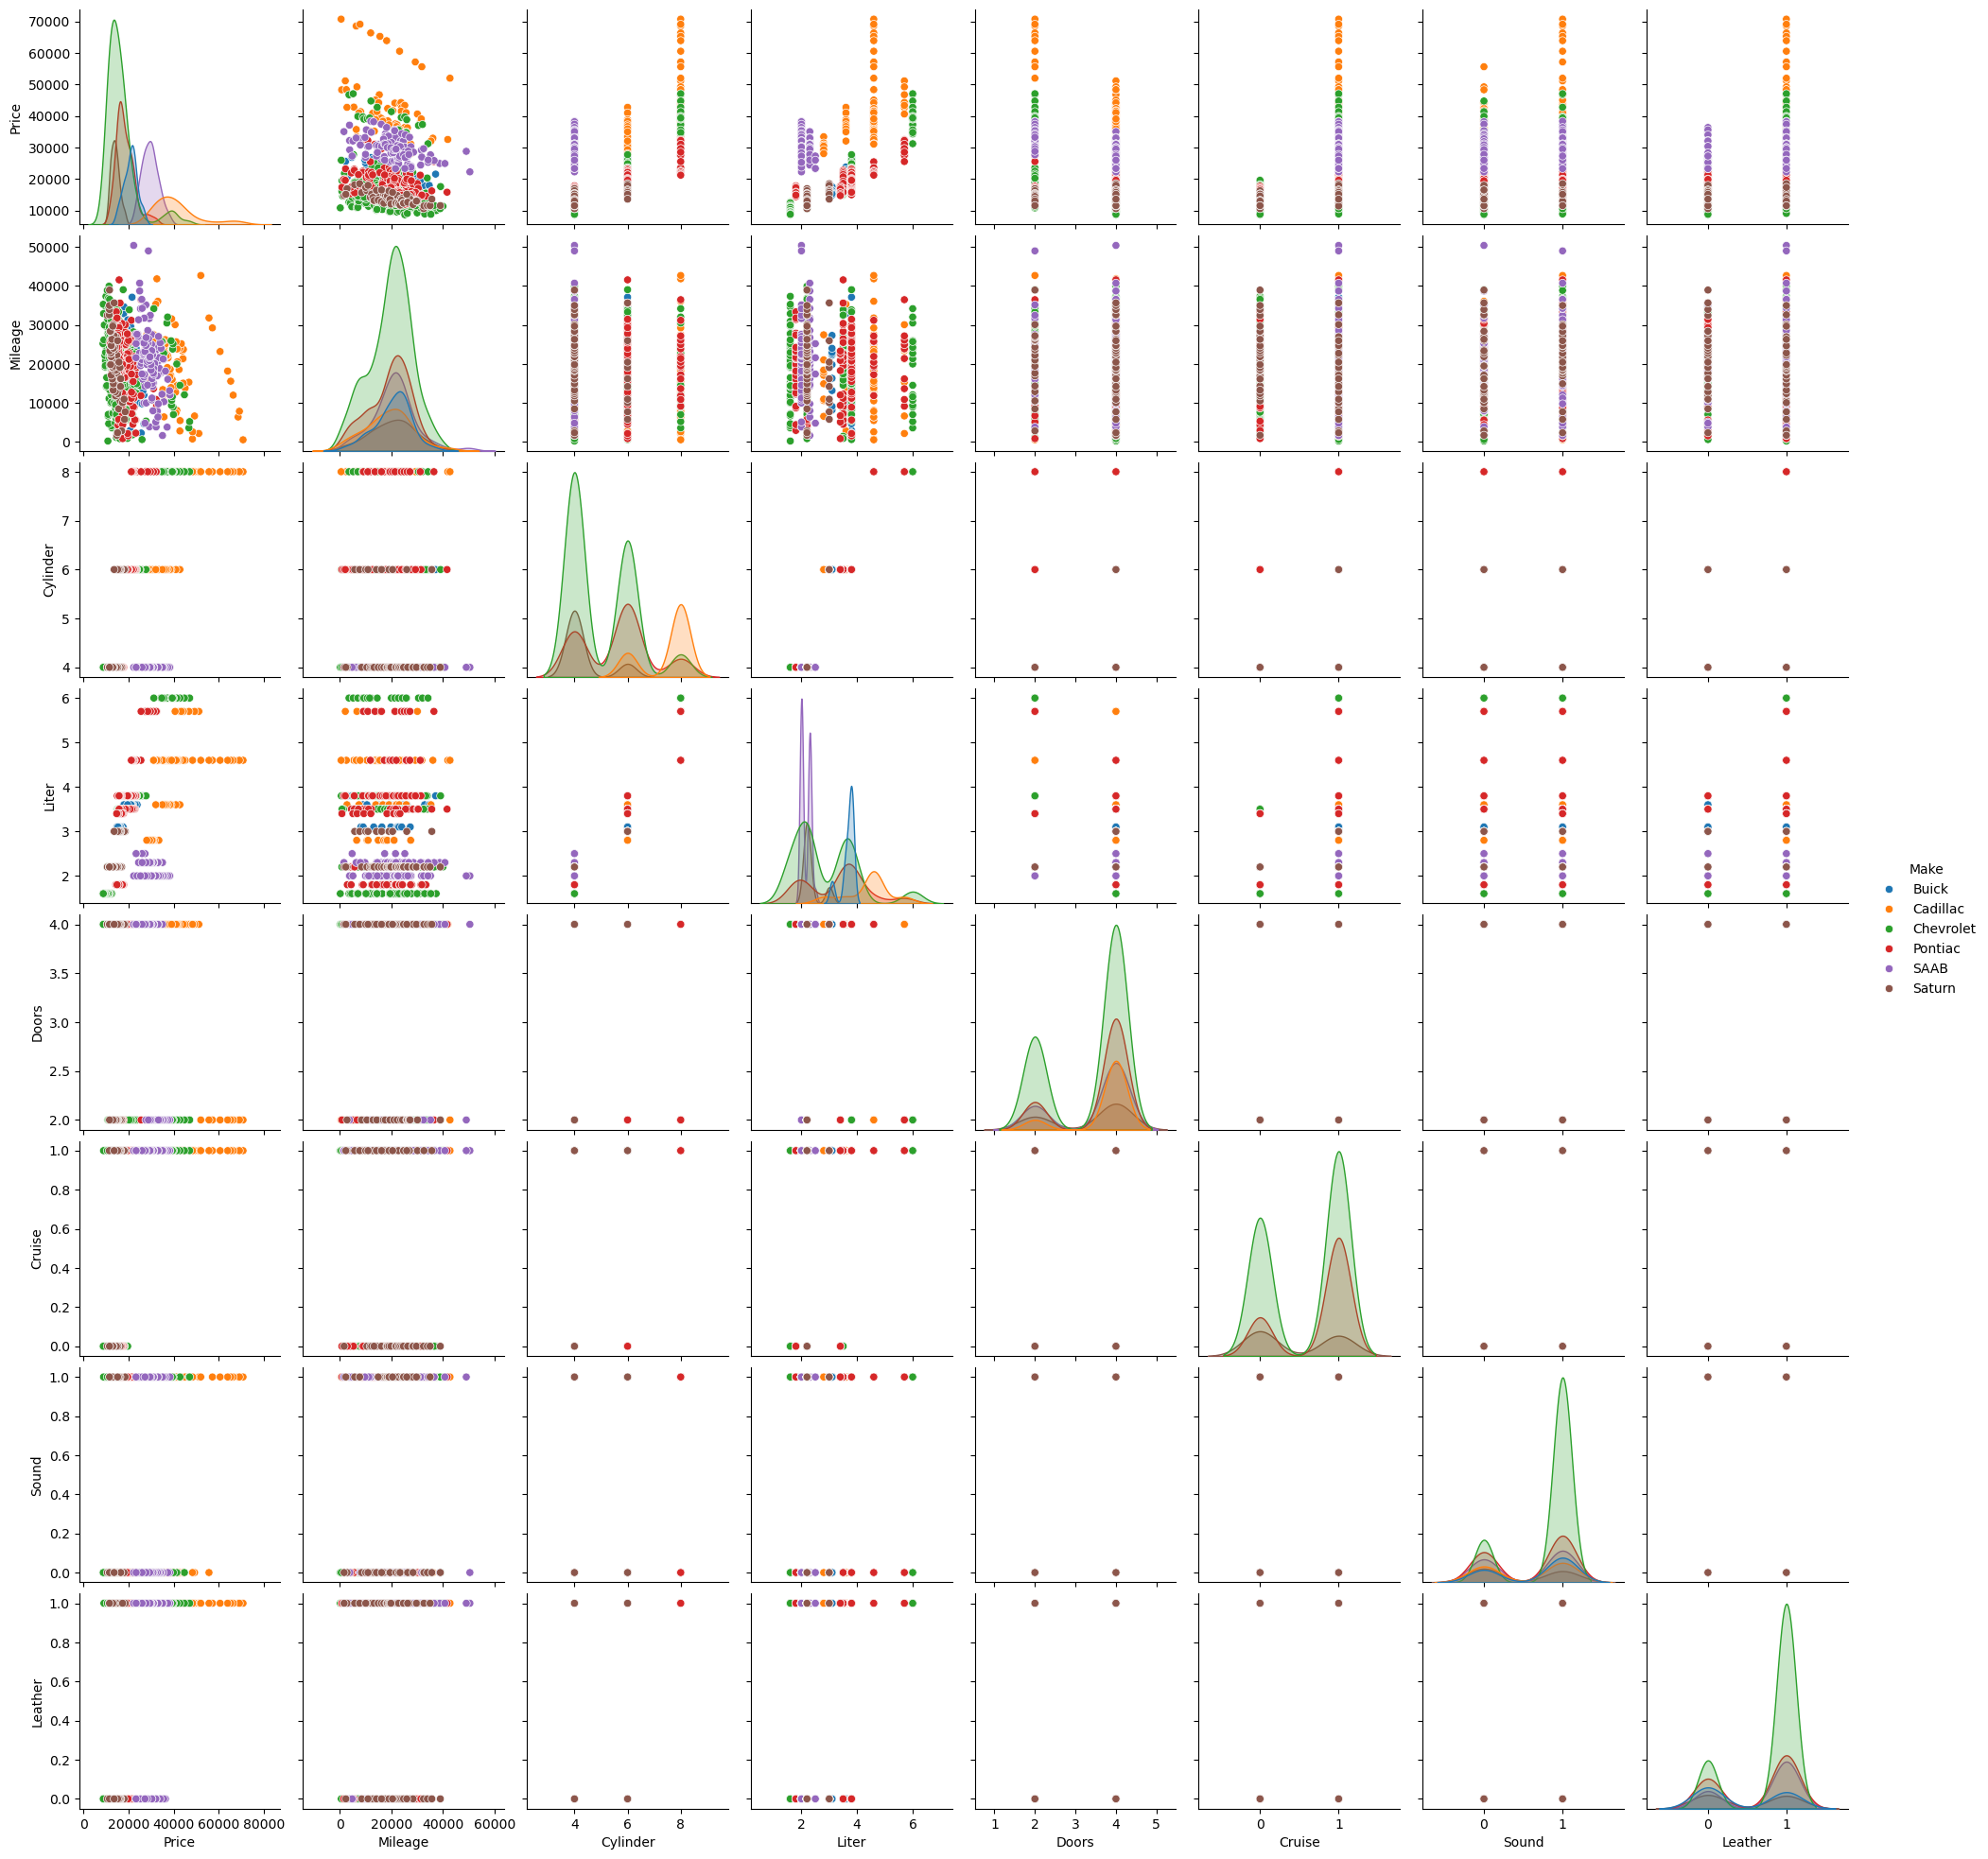

In [55]:
sns.pairplot(df , hue = 'Make') # her sutunun her sutuna göre degisimi

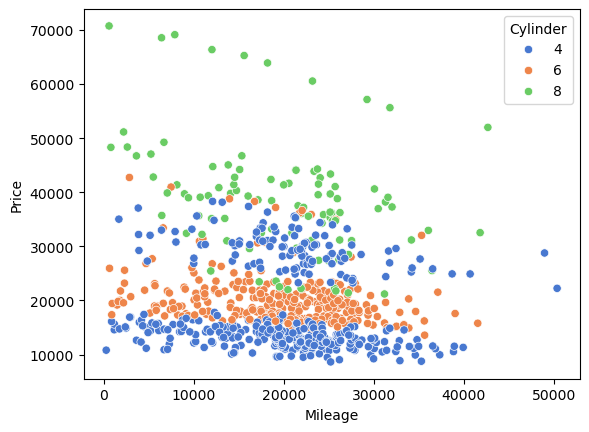

In [61]:
sns.scatterplot(x=df['Mileage'], y=df['Price'] ,hue= df['Cylinder'], palette = 'muted');

## P-value Hesaplama